In [1]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
from glob import glob
import spacy
import re
import string

import matplotlib.pyplot as plt

In [2]:
def clean_text(txt):
    whitespace = string.whitespace
    punctuation = '!#$%&\'()*+:;<=>?[\\]^`{|}~'
    tableWhiteSpace = str.maketrans("", "", whitespace)
    tablePunctuation = str.maketrans("", "", punctuation)
    text = str(txt)
    text = text.lower()
    removewhitespace = text.translate(tableWhiteSpace)
    removepunctuation = removewhitespace.translate(tablePunctuation)
    
    return str(removepunctuation)

### STEPS

Load Image

Extract Data from Text using Pytesseract

Convert Data into Content

Get Predictions from NER Model

In [3]:
# Load NER Model
model_ner = spacy.load("output/model-best/")

(-0.5, 706.5, 436.5, -0.5)

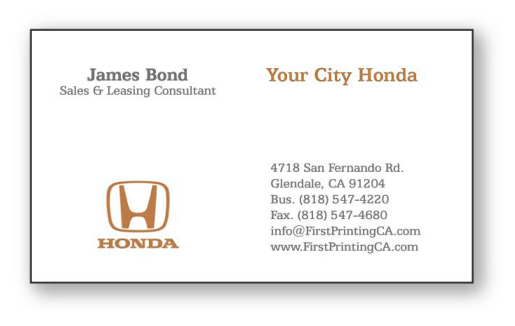

In [4]:
# Load Image

#image = cv2.imread("data/Selected/051.jpeg")
#image = cv2.imread("data/Selected/031.jpeg")
image = cv2.imread("data/Selected/053.jpeg")

                   
plt.imshow(image)
plt.axis("off")

In [5]:
# Extract Data from Text using Pytesseract

tess_data = pytesseract.image_to_data(image)
print(tess_data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	707	437	-1	
2	1	1	0	0	0	72	84	509	42	-1	
3	1	1	1	0	0	72	84	509	42	-1	
4	1	1	1	1	0	110	84	471	25	-1	
5	1	1	1	1	1	110	84	74	19	96	James
5	1	1	1	1	2	193	84	61	18	96	Bond
5	1	1	1	1	3	365	84	60	19	96	Your
5	1	1	1	1	4	434	84	53	25	96	City
5	1	1	1	1	5	496	84	85	19	96	Honda
4	1	1	1	2	0	72	109	221	17	-1	
5	1	1	1	2	1	72	109	40	13	93	Sales
5	1	1	1	2	2	119	109	14	13	59	&
5	1	1	1	2	3	138	110	62	16	96	Leasing
5	1	1	1	2	4	206	109	87	13	96	Consultant
2	1	2	0	0	0	371	219	214	129	-1	
3	1	2	1	0	0	371	219	214	129	-1	
4	1	2	1	1	0	372	219	188	13	-1	
5	1	2	1	1	1	372	220	41	12	96	4718
5	1	2	1	1	2	419	219	29	13	95	San
5	1	2	1	1	3	454	220	75	12	95	Fernando
5	1	2	1	1	4	535	220	25	12	90	Rd.
4	1	2	1	2	0	372	242	162	14	-1	
5	1	2	1	2	1	372	242	75	14	94	Glendale,
5	1	2	1	2	2	454	242	24	13	94	CA
5	1	2	1	2	3	484	242	50	13	94	91204
4	1	2	1	3	0	371	264	169	15	-1	
5	1	2	1	3	1	371	264	34	13	96	Bus.
5	1	2	1	3	2	413	264	41	15	9

In [6]:
# Convert into DataFrame
tessList = list(map(lambda x: x.split("\t"), tess_data.split("\n")))

df = pd.DataFrame(tessList[1:], columns=tessList[0])

# remove missing values
df.dropna(inplace=True)

# clean text
df["text"] = df["text"].apply(clean_text)

df[14:22]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
14,2,1,2,0,0,0,371,219,214,129,-1,
15,3,1,2,1,0,0,371,219,214,129,-1,
16,4,1,2,1,1,0,372,219,188,13,-1,
17,5,1,2,1,1,1,372,220,41,12,96,4718
18,5,1,2,1,1,2,419,219,29,13,95,san
19,5,1,2,1,1,3,454,220,75,12,95,fernando
20,5,1,2,1,1,4,535,220,25,12,90,rd.
21,4,1,2,1,2,0,372,242,162,14,-1,


In [7]:
# Convert Data into Content
df_clean = df.query("text != ''")
content = " ".join([w for w in df_clean["text"]]) # it will take and join each word by one space
print(content)

james bond your city honda sales leasing consultant 4718 san fernando rd. glendale, ca 91204 bus. 818 547-4220 fax, 818 547-4680 info@firstprintingca.com www.firstprintingca.com


In [8]:
# Get Predictions from NER Model
doc = model_ner(content)

spacy.displacy.serve(doc, style="ent") # ent -> entities

D:\ANACONDA\envs\docscanner\lib\site-packages\spacy\displacy\__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [9]:
spacy.displacy.render(doc, style="ent")

### Tagging

In [10]:
doc.to_json()

{'text': 'james bond your city honda sales leasing consultant 4718 san fernando rd. glendale, ca 91204 bus. 818 547-4220 fax, 818 547-4680 info@firstprintingca.com www.firstprintingca.com',
 'ents': [{'start': 0, 'end': 5, 'label': 'B-NAME'},
  {'start': 6, 'end': 10, 'label': 'I-NAME'},
  {'start': 11, 'end': 15, 'label': 'B-ORG'},
  {'start': 16, 'end': 20, 'label': 'I-ORG'},
  {'start': 21, 'end': 26, 'label': 'I-ORG'},
  {'start': 27, 'end': 32, 'label': 'B-DES'},
  {'start': 33, 'end': 40, 'label': 'I-DES'},
  {'start': 41, 'end': 51, 'label': 'I-DES'},
  {'start': 98, 'end': 101, 'label': 'B-PHONE'},
  {'start': 102, 'end': 110, 'label': 'I-PHONE'},
  {'start': 129, 'end': 153, 'label': 'B-EMAIL'},
  {'start': 154, 'end': 177, 'label': 'B-WEB'}],
 'tokens': [{'id': 0, 'start': 0, 'end': 5},
  {'id': 1, 'start': 6, 'end': 10},
  {'id': 2, 'start': 11, 'end': 15},
  {'id': 3, 'start': 16, 'end': 20},
  {'id': 4, 'start': 21, 'end': 26},
  {'id': 5, 'start': 27, 'end': 32},
  {'id':

In [11]:
docjson = doc.to_json()
docjson.keys()

dict_keys(['text', 'ents', 'tokens'])

In [12]:
doc_text = docjson["text"]
doc_text

'james bond your city honda sales leasing consultant 4718 san fernando rd. glendale, ca 91204 bus. 818 547-4220 fax, 818 547-4680 info@firstprintingca.com www.firstprintingca.com'

In [13]:
dataframe_tokens = pd.DataFrame(docjson["tokens"])
dataframe_tokens.head()

,id,start,end
0,0,0,5
1,1,6,10
2,2,11,15
3,3,16,20
4,4,21,26


In [14]:
dataframe_tokens["token"] = dataframe_tokens[["start", "end"]].apply(lambda x:doc_text[x[0]:x[1]], axis=1)

dataframe_tokens.head(10)

,id,start,end,token
0,0,0,5,james
1,1,6,10,bond
2,2,11,15,your
3,3,16,20,city
4,4,21,26,honda
5,5,27,32,sales
6,6,33,40,leasing
7,7,41,51,consultant
8,8,52,56,4718
9,9,57,60,san


In [15]:
doc_text[18:29]

'ty honda sa'

In [16]:
pd.DataFrame(docjson["ents"])

,start,end,label
0,0,5,B-NAME
1,6,10,I-NAME
2,11,15,B-ORG
3,16,20,I-ORG
4,21,26,I-ORG
5,27,32,B-DES
6,33,40,I-DES
7,41,51,I-DES
8,98,101,B-PHONE
9,102,110,I-PHONE


In [17]:
pd.DataFrame(docjson["ents"])[["start", "label"]]

,start,label
0,0,B-NAME
1,6,I-NAME
2,11,B-ORG
3,16,I-ORG
4,21,I-ORG
5,27,B-DES
6,33,I-DES
7,41,I-DES
8,98,B-PHONE
9,102,I-PHONE


In [18]:
doc_ents = pd.DataFrame(docjson["ents"])[["start", "label"]]
dataframe_tokens = pd.merge(dataframe_tokens, doc_ents, how="left", on="start")

dataframe_tokens.head(10)

,id,start,end,token,label
0,0,0,5,james,B-NAME
1,1,6,10,bond,I-NAME
2,2,11,15,your,B-ORG
3,3,16,20,city,I-ORG
4,4,21,26,honda,I-ORG
5,5,27,32,sales,B-DES
6,6,33,40,leasing,I-DES
7,7,41,51,consultant,I-DES
8,8,52,56,4718,NaN
9,9,57,60,san,NaN


In [19]:
dataframe_tokens.fillna("O", inplace=True)

dataframe_tokens.head(10)

,id,start,end,token,label
0,0,0,5,james,B-NAME
1,1,6,10,bond,I-NAME
2,2,11,15,your,B-ORG
3,3,16,20,city,I-ORG
4,4,21,26,honda,I-ORG
5,5,27,32,sales,B-DES
6,6,33,40,leasing,I-DES
7,7,41,51,consultant,I-DES
8,8,52,56,4718,O
9,9,57,60,san,O


In [20]:
df_clean.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,110,84,74,19,96,james
5,5,1,1,1,1,2,193,84,61,18,96,bond
6,5,1,1,1,1,3,365,84,60,19,96,your
7,5,1,1,1,1,4,434,84,53,25,96,city
8,5,1,1,1,1,5,496,84,85,19,96,honda


In [21]:
# join label to df_clean dataframe
df_clean["text"].apply(lambda x: len(x)+1)

4      6
5      5
6      5
7      5
8      6
10     6
12     8
13    11
17     5
18     4
19     9
20     4
22    10
23     3
24     6
26     5
27     4
28     9
30     5
31     4
32     9
34    25
36    24
Name: text, dtype: int64

In [22]:
# join label to df_clean dataframe
df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1

4       5
5      10
6      15
7      20
8      26
10     32
12     40
13     51
17     56
18     60
19     69
20     73
22     83
23     86
24     92
26     97
27    101
28    110
30    115
31    119
32    128
34    153
36    177
Name: text, dtype: int64

In [23]:
df_clean["end"] = df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1
df_clean["start"] = df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)

df_clean.head(10)

C:\Users\my\AppData\Local\Temp\ipykernel_10552\1712280030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["end"] = df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1
C:\Users\my\AppData\Local\Temp\ipykernel_10552\1712280030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["start"] = df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start
4,5,1,1,1,1,1,110,84,74,19,96,james,5,0
5,5,1,1,1,1,2,193,84,61,18,96,bond,10,6
6,5,1,1,1,1,3,365,84,60,19,96,your,15,11
7,5,1,1,1,1,4,434,84,53,25,96,city,20,16
8,5,1,1,1,1,5,496,84,85,19,96,honda,26,21
10,5,1,1,1,2,1,72,109,40,13,93,sales,32,27
12,5,1,1,1,2,3,138,110,62,16,96,leasing,40,33
13,5,1,1,1,2,4,206,109,87,13,96,consultant,51,41
17,5,1,2,1,1,1,372,220,41,12,96,4718,56,52
18,5,1,2,1,1,2,419,219,29,13,95,san,60,57


In [24]:
# to get correct start position
df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)

4       0
5       6
6      11
7      16
8      21
10     27
12     33
13     41
17     52
18     57
19     61
20     70
22     74
23     84
24     87
26     93
27     98
28    102
30    111
31    116
32    120
34    129
36    154
dtype: int64

In [25]:
# inner join with start 

dataframe_info = pd.merge(df_clean, dataframe_tokens[["start", "token", "label"]], how="inner", on="start")
dataframe_info.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,110,84,74,19,96,james,5,0,james,B-NAME
1,5,1,1,1,1,2,193,84,61,18,96,bond,10,6,bond,I-NAME
2,5,1,1,1,1,3,365,84,60,19,96,your,15,11,your,B-ORG
3,5,1,1,1,1,4,434,84,53,25,96,city,20,16,city,I-ORG
4,5,1,1,1,1,5,496,84,85,19,96,honda,26,21,honda,I-ORG
5,5,1,1,1,2,1,72,109,40,13,93,sales,32,27,sales,B-DES
6,5,1,1,1,2,3,138,110,62,16,96,leasing,40,33,leasing,I-DES
7,5,1,1,1,2,4,206,109,87,13,96,consultant,51,41,consultant,I-DES
8,5,1,2,1,1,1,372,220,41,12,96,4718,56,52,4718,O
9,5,1,2,1,1,2,419,219,29,13,95,san,60,57,san,O


In [26]:
dataframe_info.tail(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
13,5,1,2,1,2,2,454,242,24,13,94,ca,86,84,ca,O
14,5,1,2,1,2,3,484,242,50,13,94,91204,92,87,91204,O
15,5,1,2,1,3,1,371,264,34,13,96,bus.,97,93,bus,O
16,5,1,2,1,3,2,413,264,41,15,96,818,101,98,818,B-PHONE
17,5,1,2,1,3,3,460,264,80,13,96,547-4220,110,102,547,I-PHONE
18,5,1,2,1,4,1,372,287,31,13,96,"fax,",115,111,fax,O
19,5,1,2,1,4,2,410,287,41,15,96,818,119,116,818,O
20,5,1,2,1,4,3,458,287,80,13,96,547-4680,128,120,547,O
21,5,1,2,1,5,1,372,308,213,18,84,info@firstprintingca.com,153,129,info@firstprintingca.com,B-EMAIL
22,5,1,2,1,6,1,371,332,211,16,63,www.firstprintingca.com,177,154,www.firstprintingca.com,B-WEB


In [27]:
bb_df = dataframe_info.query("label != 'O' ")

bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,110,84,74,19,96,james,5,0,james,B-NAME
1,5,1,1,1,1,2,193,84,61,18,96,bond,10,6,bond,I-NAME
2,5,1,1,1,1,3,365,84,60,19,96,your,15,11,your,B-ORG
3,5,1,1,1,1,4,434,84,53,25,96,city,20,16,city,I-ORG
4,5,1,1,1,1,5,496,84,85,19,96,honda,26,21,honda,I-ORG
5,5,1,1,1,2,1,72,109,40,13,93,sales,32,27,sales,B-DES
6,5,1,1,1,2,3,138,110,62,16,96,leasing,40,33,leasing,I-DES
7,5,1,1,1,2,4,206,109,87,13,96,consultant,51,41,consultant,I-DES
16,5,1,2,1,3,2,413,264,41,15,96,818,101,98,818,B-PHONE
17,5,1,2,1,3,3,460,264,80,13,96,547-4220,110,102,547,I-PHONE


### Bounding Box

(-0.5, 706.5, 436.5, -0.5)

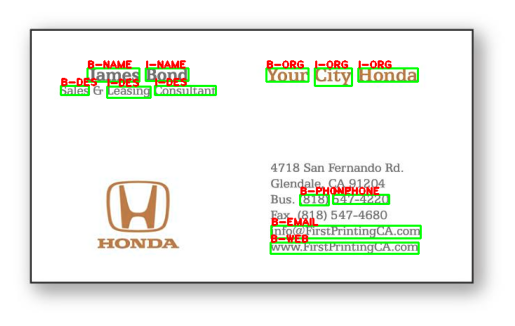

In [28]:
img = image.copy()

for x,y,w,h,label in bb_df[["left","top","width","height","label"]].values:
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    cv2.putText(img, str(label), (x,y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 2)
    
plt.imshow(img)
plt.axis("off")

In [29]:
bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,110,84,74,19,96,james,5,0,james,B-NAME
1,5,1,1,1,1,2,193,84,61,18,96,bond,10,6,bond,I-NAME
2,5,1,1,1,1,3,365,84,60,19,96,your,15,11,your,B-ORG
3,5,1,1,1,1,4,434,84,53,25,96,city,20,16,city,I-ORG
4,5,1,1,1,1,5,496,84,85,19,96,honda,26,21,honda,I-ORG
5,5,1,1,1,2,1,72,109,40,13,93,sales,32,27,sales,B-DES
6,5,1,1,1,2,3,138,110,62,16,96,leasing,40,33,leasing,I-DES
7,5,1,1,1,2,4,206,109,87,13,96,consultant,51,41,consultant,I-DES
16,5,1,2,1,3,2,413,264,41,15,96,818,101,98,818,B-PHONE
17,5,1,2,1,3,3,460,264,80,13,96,547-4220,110,102,547,I-PHONE


In [30]:
bb_df["label"] = bb_df["label"].apply(lambda x: x[2:])
bb_df

C:\Users\my\AppData\Local\Temp\ipykernel_10552\284535532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df["label"] = bb_df["label"].apply(lambda x: x[2:])


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,110,84,74,19,96,james,5,0,james,NAME
1,5,1,1,1,1,2,193,84,61,18,96,bond,10,6,bond,NAME
2,5,1,1,1,1,3,365,84,60,19,96,your,15,11,your,ORG
3,5,1,1,1,1,4,434,84,53,25,96,city,20,16,city,ORG
4,5,1,1,1,1,5,496,84,85,19,96,honda,26,21,honda,ORG
5,5,1,1,1,2,1,72,109,40,13,93,sales,32,27,sales,DES
6,5,1,1,1,2,3,138,110,62,16,96,leasing,40,33,leasing,DES
7,5,1,1,1,2,4,206,109,87,13,96,consultant,51,41,consultant,DES
16,5,1,2,1,3,2,413,264,41,15,96,818,101,98,818,PHONE
17,5,1,2,1,3,3,460,264,80,13,96,547-4220,110,102,547,PHONE


In [31]:
# group the label
class groupgen():
    def __init__(self):
        self.id = 0
        self.text = ""
        
    def getgroup(self, text):
        if self.text == text:
            return self.id
        else:
            self.id += 1
            self.text = text
            return self.id
        
grp_gen = groupgen()

In [32]:
bb_df["group"] = bb_df["label"].apply(grp_gen.getgroup)
bb_df

C:\Users\my\AppData\Local\Temp\ipykernel_10552\119033978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df["group"] = bb_df["label"].apply(grp_gen.getgroup)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group
0,5,1,1,1,1,1,110,84,74,19,96,james,5,0,james,NAME,1
1,5,1,1,1,1,2,193,84,61,18,96,bond,10,6,bond,NAME,1
2,5,1,1,1,1,3,365,84,60,19,96,your,15,11,your,ORG,2
3,5,1,1,1,1,4,434,84,53,25,96,city,20,16,city,ORG,2
4,5,1,1,1,1,5,496,84,85,19,96,honda,26,21,honda,ORG,2
5,5,1,1,1,2,1,72,109,40,13,93,sales,32,27,sales,DES,3
6,5,1,1,1,2,3,138,110,62,16,96,leasing,40,33,leasing,DES,3
7,5,1,1,1,2,4,206,109,87,13,96,consultant,51,41,consultant,DES,3
16,5,1,2,1,3,2,413,264,41,15,96,818,101,98,818,PHONE,4
17,5,1,2,1,3,3,460,264,80,13,96,547-4220,110,102,547,PHONE,4


In [33]:
# right and bottom of bounding box

bb_df[["left","top","width","height"]] = bb_df[["left","top","width","height"]].astype(int)

bb_df["right"] = bb_df["left"] + bb_df["width"]
bb_df["bottom"] = bb_df["top"] + bb_df["height"]

C:\Users\my\AppData\Local\Temp\ipykernel_10552\2713810823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df[["left","top","width","height"]] = bb_df[["left","top","width","height"]].astype(int)
C:\Users\my\AppData\Local\Temp\ipykernel_10552\2713810823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df["right"] = bb_df["left"] + bb_df["width"]
C:\Users\my\AppData\Local\Temp\ipykernel_10552\2713810823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [34]:
bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group,right,bottom
0,5,1,1,1,1,1,110,84,74,19,96,james,5,0,james,NAME,1,184,103
1,5,1,1,1,1,2,193,84,61,18,96,bond,10,6,bond,NAME,1,254,102
2,5,1,1,1,1,3,365,84,60,19,96,your,15,11,your,ORG,2,425,103
3,5,1,1,1,1,4,434,84,53,25,96,city,20,16,city,ORG,2,487,109
4,5,1,1,1,1,5,496,84,85,19,96,honda,26,21,honda,ORG,2,581,103
5,5,1,1,1,2,1,72,109,40,13,93,sales,32,27,sales,DES,3,112,122
6,5,1,1,1,2,3,138,110,62,16,96,leasing,40,33,leasing,DES,3,200,126
7,5,1,1,1,2,4,206,109,87,13,96,consultant,51,41,consultant,DES,3,293,122
16,5,1,2,1,3,2,413,264,41,15,96,818,101,98,818,PHONE,4,454,279
17,5,1,2,1,3,3,460,264,80,13,96,547-4220,110,102,547,PHONE,4,540,277


In [35]:
# tagging: groupby by group

col_group = ["left","top","right","bottom","label","token","group"]

group_tag_img = bb_df[col_group].groupby(by="group")

img_tagging = group_tag_img.agg({
    
    "left": min,
    "right": max,
    "top": min,
    "bottom": max,
    "label": np.unique,
    "token": lambda x: " ".join(x)
    
})

In [36]:
img_tagging

,left,right,top,bottom,label,token
group,,,,,,
1,110,254,84,103,[NAME],james bond
2,365,581,84,109,[ORG],your city honda
3,72,293,109,126,[DES],sales leasing consultant
4,413,540,264,279,[PHONE],818 547
5,372,585,308,326,[EMAIL],info@firstprintingca.com
6,371,582,332,348,[WEB],www.firstprintingca.com


In [37]:
img_tagging["label"] = img_tagging["label"].apply(clean_text)

In [38]:
img_tagging

,left,right,top,bottom,label,token
group,,,,,,
1,110,254,84,103,name,james bond
2,365,581,84,109,org,your city honda
3,72,293,109,126,des,sales leasing consultant
4,413,540,264,279,phone,818 547
5,372,585,308,326,email,info@firstprintingca.com
6,371,582,332,348,web,www.firstprintingca.com


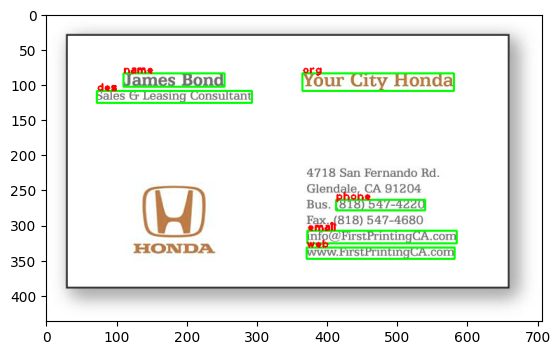

In [39]:
img_bb = image.copy()

for l,r,t,b,label,token in img_tagging.values:
    cv2.rectangle(img_bb, (l,t), (r,b), (0,255,0),2)
    cv2.putText(img_bb, str(label), (l,t), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 2)
    
plt.imshow(img_bb)

# Parser

In [40]:
def parser(text,label):
    if label == "PHONE":
        text = text.lower()
        text = re.sub(r"\D","",text)
    
    elif label == "EMAIL":
        text = text.lower()
        allow_special_char = "@_.\-"
        text = re.sub(r"[^A-Za-z0-9{} ]".format(allow_special_char),"",text)
        
    elif label == "WEB":
        text = text.lower()
        allow_special_char = ":/.%#\-"
        text = re.sub(r"[^A-Za-z0-9{} ]".format(allow_special_char),"",text)
        
    elif label in ("NAME", "DES"):
        text = text.lower()
        allow_special_char = ":/.%#-"
        text = re.sub(r"[^a-z ]","",text)
        text = text.title()
        
    elif label == "ORG":
        text = text.lower()
        allow_special_char = ":/.%#-"
        text = re.sub(r"[^a-z0-9 ]","",text)
        text = text.title()
        
    return text

In [41]:
parser("Erol 123424", "NAME")

'Erol '

In [42]:
parser("i(erols}en)@outlook.com", "EMAIL")

'ierolsen@outlook.com'

# Entities

In [43]:
dataframe_info.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,110,84,74,19,96,james,5,0,james,B-NAME
1,5,1,1,1,1,2,193,84,61,18,96,bond,10,6,bond,I-NAME
2,5,1,1,1,1,3,365,84,60,19,96,your,15,11,your,B-ORG
3,5,1,1,1,1,4,434,84,53,25,96,city,20,16,city,I-ORG
4,5,1,1,1,1,5,496,84,85,19,96,honda,26,21,honda,I-ORG


In [44]:
dataframe_info[["token", "label"]]

,token,label
0,james,B-NAME
1,bond,I-NAME
2,your,B-ORG
3,city,I-ORG
4,honda,I-ORG
5,sales,B-DES
6,leasing,I-DES
7,consultant,I-DES
8,4718,O
9,san,O


In [45]:
info_array = dataframe_info[["token", "label"]].values
entities = dict(NAME=[], ORG=[], DES=[], PHONE=[], EMAIL=[], WEB=[])

previous = "O"
for token, label in info_array:
    #print(token, label)
    bio_tag = label[0]
    label_tag = label[2:]
    #print(bio_tag, label_tag)
    
    # parse the token
    text = parser(token, label_tag)
    
    if bio_tag in ("B", "I"):
        
        if previous != label_tag:
            entities[label_tag].append(text)
            
        else:
            if bio_tag == "B":
                entities[label_tag].append(text)
            else:
                if label_tag in ("NAME", "ORG", "DES"):
                    entities[label_tag][-1] = entities[label_tag][-1] + " " + text
                else:
                    entities[label_tag][-1] = entities[label_tag][-1] + text
                
    previous = label_tag

In [46]:
entities

{'NAME': ['James Bond'],
 'ORG': ['Your City Honda'],
 'DES': ['Sales Leasing Consultant'],
 'PHONE': ['818547'],
 'EMAIL': ['info@firstprintingca.com'],
 'WEB': ['www.firstprintingca.com']}